##DR methods module

In [ ]:
!pip install umap-learn
!pip install trimap
!pip install pacmap
!pip install nimfa
!pip install ivis
!pip install phate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=551927 sha256=c5b80fe3c56a33eeacb797e4a51b4803eb5ff988f4dbb6893d6c1d5fd626ed69
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.6/602.6 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.manifold import Isomap
from sklearn.decomposition import KernelPCA
import trimap
import pacmap
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import SparsePCA
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA,IncrementalPCA
from ivis import Ivis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding
import phate
from sklearn.manifold import SpectralEmbedding

from nimfa import Snmf,Psmf,Pmf,Nsnmf,Nmf,Lsnmf,Icm,Bd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, f1_score, adjusted_rand_score, davies_bouldin_score, silhouette_score, calinski_harabasz_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#DR score heatmap - label: cell 1, cell 2, moa, drug, dose

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation, SpectralClustering
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, f1_score, adjusted_rand_score, davies_bouldin_score, silhouette_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation, SpectralClustering
import nimfa

In [ ]:
#데이터 정의
import pandas as pd

#cell
vori_cell=pd.read_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/0408_samples/vori_cell.csv',index_col=0) #152*12329

#moa (drug)
moa=pd.read_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/0408_samples/A549_5moa_Re.csv',index_col=0) #279*12329

#drug (com)
d=pd.read_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/0417/Top10drug.csv',index_col=0) #120*12329

#dose (cat)
dose=pd.read_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/0408_samples/m_dos_a.csv',index_col=0) #47*12329
dose['cat']=dose['cat'].astype(str)

In [ ]:
datasets={'Cell':vori_cell,'MOA':moa,'Drug':d,'Dose':dose}

In [ ]:
n=2 #2,4,8,16,32

In [ ]:
import time
from sklearn.preprocessing import MinMaxScaler

# Define models1
models = {
    'PCA': PCA(n_components=n),
    'IPCA': IncrementalPCA(n_components=n),
    #'SPCA': SparsePCA(n_components=n),
    'FA': FactorAnalysis(n_components=n, rotation='varimax'),
    'LLE': LocallyLinearEmbedding(n_components=n),
    'kpca_rbf': KernelPCA(n_components=n, kernel="rbf"),
    'kpca_poly': KernelPCA(n_components=n, kernel="poly"),
    'kpca_linear': KernelPCA(n_components=n, kernel="linear"),
    'kpca_cos': KernelPCA(n_components=n, kernel="cosine"),
    'Phate': phate.PHATE(n_components=n),
    'Spectral': SpectralEmbedding(n_components=n),
    'TSVD': TruncatedSVD(n_components=n, n_iter=1000, random_state=7),
    'Gaussian Random Projection': GaussianRandomProjection(n_components=n, eps=0.1, random_state=7),
    'Sparse Random Projection': SparseRandomProjection(n_components=n, eps=0.1, random_state=7),
    'FastICA': FastICA(n_components=n, algorithm='parallel', whiten='arbitrary-variance', max_iter=1000, random_state=7),
    't-SNE': TSNE(n_components=n, random_state=7,method='exact'),
    'UMAP': UMAP(n_components=n, init='random', random_state=7),
    'Isomap': Isomap(n_components=n),
    'TRIMAP': trimap.TRIMAP(n_dims=n),
    'PaCMAP': pacmap.PaCMAP(n_components=n),
}

V = datasets['Dose'].iloc[:, :12328]

scaler=MinMaxScaler()
V_scaled=scaler.fit_transform(V)

# Define models2
models2 = {
    'Snmif': Snmf(V_scaled, seed="random_vcol", rank=n, max_iter=1000),
    'Pmf': Pmf(V_scaled, seed="random_vcol", rank=n, max_iter=1000),
    'Nsnmf': Nsnmf(V_scaled, seed="nndsvd", rank=n, max_iter=1000),
    'NMF_LEE': Nmf(V_scaled, seed="nndsvd", rank=n, max_iter=1000),
    'Lsnmf': Lsnmf(V_scaled, seed="random_vcol", rank=n, max_iter=1000),
    'ICM': Icm(V_scaled, seed="random_vcol", rank=n, max_iter=1000),
    'BD': Bd(V_scaled, seed="random_vcol", rank=n, max_iter=1000)
}

# Combine both dictionaries
all_models = {**models, **models2} #** 딕셔너리 언패킹 통해서 통합


results = {name: {} for name in all_models.keys()}
labels = datasets['Dose'].iloc[:, 12328]

total_models = len(all_models)
start_time = time.time()

for i, (name, model) in enumerate(all_models.items(), 1): #인덱스가 1부터 시작하도록
    print(f"Processing {name} ({i}/{total_models})")
    model_start_time = time.time()

    if name in models:
        projections = model.fit_transform(V)
    else:
        projections = np.array(model().basis())

    # Evaluate metrics
    results[name]['Variance Ratio Criterion'] = calinski_harabasz_score(projections, labels)
    results[name]['Silhouette'] = silhouette_score(projections, labels)
    results[name]['Davies-Bouldin'] = davies_bouldin_score(projections, labels) * (-1)
    results[name]['Experiment'] = list(datasets.keys())[4]

    model_end_time = time.time()
    elapsed_time = model_end_time - model_start_time
    print(f"Finished {name} in {elapsed_time:.2f} seconds")

total_time = time.time() - start_time
print(f"All models processed in {total_time:.2f} seconds")


Processing PCA (1/25)
Finished PCA in 0.75 seconds
Processing IPCA (2/25)
Finished IPCA in 2.41 seconds
Processing FA (3/25)
Finished FA in 3.77 seconds
Processing LLE (4/25)
Finished LLE in 0.39 seconds
Processing kpca_rbf (5/25)
Finished kpca_rbf in 0.24 seconds
Processing kpca_poly (6/25)
Finished kpca_poly in 0.31 seconds
Processing kpca_linear (7/25)
Finished kpca_linear in 0.25 seconds
Processing kpca_cos (8/25)
Finished kpca_cos in 0.29 seconds
Processing Phate (9/25)
Calculating PHATE...
  Running PHATE on 152 observations and 12328 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.23 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 1.28 seconds.
  Calculating optimal t...
    Automatically selected t = 9
  Calculated optimal t in 0.04 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculat

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Finished UMAP in 3.11 seconds
Processing Isomap (17/25)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

Finished Isomap in 0.25 seconds
Processing TRIMAP (18/25)
Finished TRIMAP in 1.01 seconds
Processing PaCMAP (19/25)
Finished PaCMAP in 0.83 seconds
Processing Snmif (20/25)
Finished Snmif in 30.97 seconds
Processing Nsnmf (21/25)
Finished Nsnmf in 171.18 seconds
Processing NMF_LEE (22/25)
Finished NMF_LEE in 43.20 seconds
Processing Lsnmf (23/25)
Finished Lsnmf in 12.74 seconds
Processing ICM (24/25)
Finished ICM in 201.54 seconds
Processing BD (25/25)
Finished BD in 1.97 seconds
Processing PCA (1/25)
Finished PCA in 0.25 seconds
Processing IPCA (2/25)
Finished IPCA in 0.69 seconds
Processing FA (3/25)
Finished FA in 1.74 seconds
Processing LLE (4/25)
Finished LLE in 0.28 seconds
Processing kpca_rbf (5/25)
Finished kpca_rbf in 0.17 seconds
Processing kpca_poly (6/25)
Finished kpca_poly in 0.20 seconds
Processing kpca_linear (7/25)
Finished kpca_linear in 0.20 seconds
Processing kpca_cos (8/25)
Finished kpca_cos in 0.21 seconds
Processing Phate (9/25)
Calculating PHATE...
  Running PHAT

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Finished Phate in 1.15 seconds
Processing Spectral (10/25)
Finished Spectral in 0.16 seconds
Processing TSVD (11/25)
Finished TSVD in 16.51 seconds
Processing Gaussian Random Projection (12/25)
Finished Gaussian Random Projection in 0.23 seconds
Processing Sparse Random Projection (13/25)
Finished Sparse Random Projection in 0.23 seconds
Processing FastICA (14/25)
Finished FastICA in 0.52 seconds
Processing t-SNE (15/25)
Finished t-SNE in 4.48 seconds
Processing UMAP (16/25)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Finished UMAP in 1.69 seconds
Processing Isomap (17/25)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

Finished Isomap in 0.27 seconds
Processing TRIMAP (18/25)
Finished TRIMAP in 1.02 seconds
Processing PaCMAP (19/25)
Finished PaCMAP in 0.86 seconds
Processing Snmif (20/25)
Finished Snmif in 75.36 seconds
Processing Nsnmf (21/25)
Finished Nsnmf in 163.59 seconds
Processing NMF_LEE (22/25)
Finished NMF_LEE in 46.97 seconds
Processing Lsnmf (23/25)
Finished Lsnmf in 2.66 seconds
Processing ICM (24/25)
Finished ICM in 284.25 seconds
Processing BD (25/25)
Finished BD in 2.53 seconds
All models processed in 606.24 seconds


In [ ]:
# Add NMF
for n in embedding_size:
  nmf = NMF(n_components=n, init='nndsvd', random_state=0, max_iter=1000)
  projections1 = nmf.fit_transform(V_scaled)
  labels2=AgglomerativeClustering(n_clusters=k).fit_predict(projections1)
  results[f'Nmf_{n}'] = {
      'Variance Ratio Criterion': calinski_harabasz_score(projections1, labels),
      'Silhouette': silhouette_score(projections1, labels),
      'Davies-Bouldin': davies_bouldin_score(projections1, labels) * (-1),
      'NMI' : normalized_mutual_info_score(labels, labels2),
      'ARI' : adjusted_rand_score(labels, labels2),
      'Experiment': list(datasets.keys())[1]
  }

  # Add IVIS
  ivis = Ivis(embedding_dims=n, k=9, batch_size=16) #*******************************************
  projections2 = ivis.fit_transform(V_scaled)
  labels2=AgglomerativeClustering(n_clusters=k).fit_predict(projections2)

  results[f'IVIS_{n}'] = {
      'Variance Ratio Criterion': calinski_harabasz_score(projections2, labels),
      'Silhouette': silhouette_score(projections2, labels),
      'Davies-Bouldin': davies_bouldin_score(projections2, labels) * (-1),
      'NMI' : normalized_mutual_info_score(labels, labels2),
      'ARI' : adjusted_rand_score(labels, labels2),
      'Experiment': list(datasets.keys())[1]
  }

  # Add PSMF
  psmf = Psmf(V_scaled, rank=n, max_iter=1000)
  projections3 = psmf().basis()
  labels2=AgglomerativeClustering(n_clusters=k).fit_predict(projections3.toarray())
  results[f'Psmf_{n}'] = {
      'Variance Ratio Criterion': calinski_harabasz_score(projections3.toarray(), labels),
      'Silhouette': silhouette_score(projections3.toarray(), labels),
      'Davies-Bouldin': davies_bouldin_score(projections3.toarray(), labels) * (-1),
      'NMI' : normalized_mutual_info_score(labels, labels2),
      'ARI' : adjusted_rand_score(labels, labels2),
      'Experiment': list(datasets.keys())[1]
  }


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


Building KNN index


100%|██████████| 49/49 [00:00<00:00, 356.19it/s]


Extracting KNN neighbours


100%|██████████| 49/49 [00:00<00:00, 242.37it/s]


Training neural network
Epoch 1/1000
4/4 [==============================] - 2s 17ms/step - loss: 0.9848
Epoch 2/1000
4/4 [==============================] - 0s 32ms/step - loss: 1.0933
Epoch 3/1000
4/4 [==============================] - 0s 22ms/step - loss: 2.3412
Epoch 4/1000
4/4 [==============================] - 0s 20ms/step - loss: 1.2918
Epoch 5/1000
4/4 [==============================] - 0s 19ms/step - loss: 2.7849
Epoch 6/1000
4/4 [==============================] - 0s 22ms/step - loss: 1.5312
Epoch 7/1000
4/4 [==============================] - 0s 22ms/step - loss: 1.6122
Epoch 8/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.6009
Epoch 9/1000
4/4 [==============================] - 0s 19ms/step - loss: 1.2969
Epoch 10/1000
4/4 [==============================] - 0s 22ms/step - loss: 1.4726
Epoch 11/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.9549
Epoch 12/1000
4/4 [==============================] - 0s 18ms/step - loss: 1.9601
Epoch 13/1000

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


Building KNN index


100%|██████████| 49/49 [00:00<00:00, 324.91it/s]


Extracting KNN neighbours


100%|██████████| 49/49 [00:00<00:00, 488.16it/s]


Training neural network
Epoch 1/1000
4/4 [==============================] - 1s 20ms/step - loss: 0.6828
Epoch 2/1000
4/4 [==============================] - 0s 32ms/step - loss: 1.8428
Epoch 3/1000
4/4 [==============================] - 0s 29ms/step - loss: 1.1361
Epoch 4/1000
4/4 [==============================] - 0s 28ms/step - loss: 2.4695
Epoch 5/1000
4/4 [==============================] - 0s 32ms/step - loss: 1.7559
Epoch 6/1000
4/4 [==============================] - 0s 44ms/step - loss: 1.5632
Epoch 7/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.8996
Epoch 8/1000
4/4 [==============================] - 0s 36ms/step - loss: 1.2875
Epoch 9/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.8885
Epoch 10/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.9975
Epoch 11/1000
4/4 [==============================] - 0s 42ms/step - loss: 1.2858
Epoch 12/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.6312
Epoch 13/1000

In [ ]:
all_results=[]

In [ ]:
all_results.append(pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Method'}))

In [ ]:
results_df=pd.concat(all_results)
results_df

,Method,Variance Ratio Criterion,Silhouette,Davies-Bouldin,NMI,ARI,Experiment
0,PCA_16,17.292168,0.071702,-1.894879,0.553576,0.287709,Dose
1,IPCA_16,17.250725,0.069229,-1.891193,0.553576,0.287709,Dose
2,SPCA_16,11.750206,0.07589,-1.914533,0.62678,0.377185,Dose
3,FA_16,2.28789,-0.008199,-2.861595,0.33852,0.07607,Dose
4,LLE_16,2.754412,0.046389,-2.686528,0.596592,0.351688,Dose
5,kpca_rbf_16,7.966267,0.101823,-2.023443,0.619431,0.346584,Dose
6,kpca_poly_16,7.447968,0.019697,-1.807013,0.486818,0.188451,Dose
7,kpca_linear_16,17.250725,0.069229,-1.891193,0.553576,0.287709,Dose
8,kpca_cos_16,11.850889,0.032374,-2.03432,0.719683,0.685226,Dose
9,Phate_16,172.744038,0.408419,-0.949216,0.692642,0.417643,Dose


In [ ]:
results_df.to_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/5subjects_30methods_6dimensions_Cell_1_16-32.csv')

In [ ]:
results_df2=pd.read_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/5subjects_30methods_6dimensions_Cell_1_16-32.csv')

###Best 6 DR methods + 5 Clustering methods

In [ ]:
!pip install hdbscan
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.5 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation, SpectralClustering
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, f1_score, adjusted_rand_score, davies_bouldin_score, silhouette_score
import numpy as np
from sklearn_extra.cluster import KMedoids
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan

In [ ]:
#데이터 정의
import pandas as pd

#cell
vori_cell=pd.read_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/0408_samples/vori_cell.csv',index_col=0) #152*12329

#cell2
gelda_cell=pd.read_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/0417/gelda_cell.csv',index_col=0) #135*12329

#moa (drug)
Moa=pd.read_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/0408_samples/A549_5moa_Re.csv',index_col=0) #279*12329

#drug (com)
d=pd.read_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/0417/Top10drug.csv',index_col=0) #120*12329

#dose (cat)
Dose=pd.read_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/0408_samples/m_dos_a.csv',index_col=0) #47*12329
Dose['cat']=Dose['cat'].astype(str)

In [ ]:
datasets2={'Cell_1':vori_cell,'Cell_2':gelda_cell,'MOA':Moa,'Drug':d,'Dose':Dose}

In [ ]:
n=2

In [ ]:
k=9

In [ ]:
cluster_methods={    # 클러스터링 적용
    'Hierarchical': AgglomerativeClustering(n_clusters=k),
    'KMeans': KMeans(n_clusters=k, random_state=7),
    'AP': AffinityPropagation(),
    'KMedoids': KMedoids(n_clusters=k, random_state=7),
    'HDBSCAN': hdbscan.HDBSCAN(min_cluster_size=5,algorithm='best')}

In [ ]:
results={}

for cluster_name, cluster_method in cluster_methods.items():
    models = {
        'Spectral': SpectralEmbedding(n_components=n),
        'Phate': phate.PHATE(n_components=n),
        'UMAP': UMAP(n_components=2, init='random', random_state=7),
        'TRIMAP': trimap.TRIMAP(n_dims=2),
        'PaCMAP': pacmap.PaCMAP(n_components=2),
    }

    V = datasets2['Dose'].iloc[:, :12328]
    labels = datasets2['Dose'].iloc[:, 12328]

    for name, model in models.items():
        projections = model.fit_transform(V)

        labels2 = cluster_method.fit_predict(projections)

        # 결과 저장
        results[f'{name}_{cluster_name}'] = {}
        results[f'{name}_{cluster_name}']['Silhouette'] = silhouette_score(projections, labels)
        results[f'{name}_{cluster_name}']['NMI'] = normalized_mutual_info_score(labels, labels2)
        results[f'{name}_{cluster_name}']['Experiment'] = list(datasets2.keys())[4]



Calculating PHATE...
  Running PHATE on 49 observations and 12328 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.06 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.08 seconds.
  Calculating optimal t...
    Automatically selected t = 13
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.14 seconds.


/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (49, 12328) is expensive. Consider setting n_pca.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Calculating PHATE...
  Running PHATE on 49 observations and 12328 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.06 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.08 seconds.
  Calculating optimal t...
    Automatically selected t = 13
  Calculated optimal t in 0.02 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.16 seconds.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (49, 12328) is expensive. Consider setting n_pca.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning

Calculating PHATE...
  Running PHATE on 49 observations and 12328 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.12 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.14 seconds.
  Calculating optimal t...
    Automatically selected t = 13
  Calculated optimal t in 0.02 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.20 seconds.


/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (49, 12328) is expensive. Consider setting n_pca.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Calculating PHATE...
  Running PHATE on 49 observations and 12328 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.09 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.12 seconds.
  Calculating optimal t...
    Automatically selected t = 13
  Calculated optimal t in 0.02 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.17 seconds.


/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (49, 12328) is expensive. Consider setting n_pca.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Calculating PHATE...
  Running PHATE on 49 observations and 12328 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.06 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.07 seconds.
  Calculating optimal t...
    Automatically selected t = 13
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.12 seconds.


/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (49, 12328) is expensive. Consider setting n_pca.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
#all_results=[]

In [ ]:
all_results.append(pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Method'}))

In [ ]:
results_df=pd.concat(all_results)
results_df

,Method,Silhouette,NMI,Experiment
0,Spectral_Hierarchical,0.71702,0.867869,Cell_1
1,Phate_Hierarchical,0.526941,0.856801,Cell_1
2,UMAP_Hierarchical,0.893822,1.0,Cell_1
3,TRIMAP_Hierarchical,0.902253,1.0,Cell_1
4,PaCMAP_Hierarchical,0.909181,0.980832,Cell_1
...,...,...,...,...
20,Spectral_HDBSCAN,0.47005,0.687122,Dose
21,Phate_HDBSCAN,0.409338,0.705703,Dose
22,UMAP_HDBSCAN,0.071205,0.519003,Dose
23,TRIMAP_HDBSCAN,0.110257,0.670338,Dose


In [ ]:
results_df['Clustering_methods'] = results_df['Method'].apply(lambda row: row.split('_')[-1])
results_df['DR_methods'] = results_df['Method'].apply(lambda row: row.split('_')[0])

In [ ]:
results_df.to_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/5DR+5Clustering_results.csv')

In [ ]:
results_df2=results_df[results_df['Experiment']=='Drug']

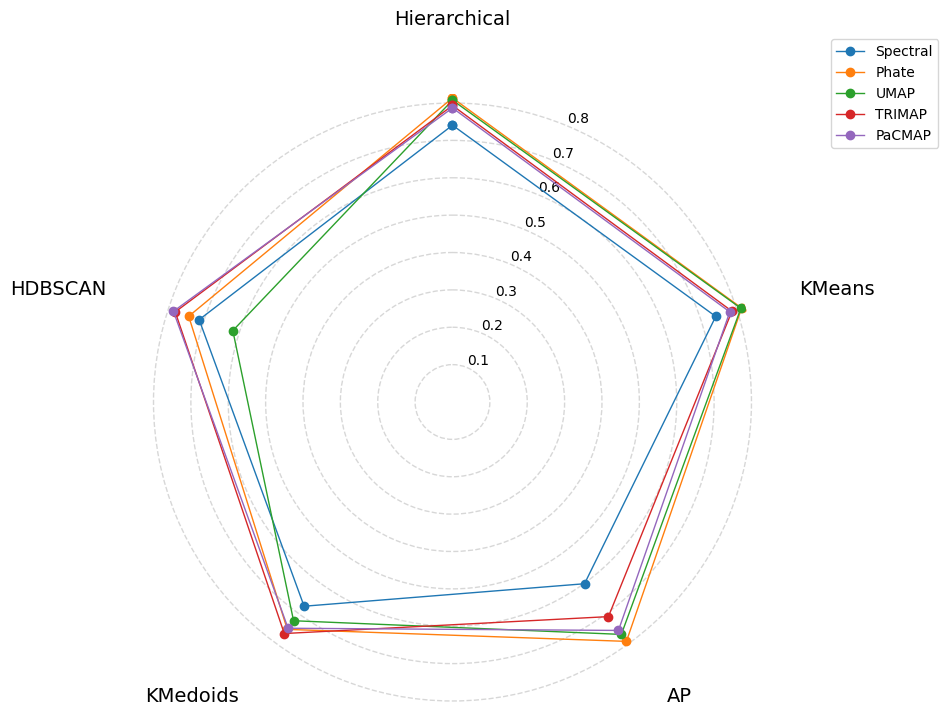

In [ ]:
# Clustering methods와 DR methods 추출
clustering_methods = results_df2['Clustering_methods'].unique()
dr_methods = results_df2['DR_methods'].unique()

# 레이더 차트를 위한 데이터 준비
scores = {dr: [] for dr in dr_methods}
for dr in dr_methods:
    for cluster in clustering_methods:
        nmi_score = results_df2[(results_df2['DR_methods'] == dr) & (results_df2['Clustering_methods'] == cluster)]['NMI'].values[0]
        scores[dr].append(nmi_score)

# 레이더 차트 그리기
labels = clustering_methods
num_vars = len(labels)

# 각 DR 방법에 대한 각도를 계산
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 레이더 차트는 원을 닫아야 하므로 마지막 값을 추가
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 각 DR 방법에 대해 레이더 차트 그리기
for dr, nmi_scores in scores.items():
    values = nmi_scores + nmi_scores[:1]
    ax.plot(angles, values, linewidth=1, label=dr, linestyle='-', marker='o')

# 오각형 형태를 맞추기 위해 그리드 설정
ax.spines['polar'].set_visible(False)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 그리드 라인 설정
ax.xaxis.set_tick_params(size=0)
ax.yaxis.set_tick_params(size=0)
ax.grid(linewidth=1, linestyle='--', alpha=0.5)

# 각도 라벨 제거
ax.set_xticks([])

# 각도와 레이블 위치 설정
for i in range(num_vars):
    angle_rad = angles[i]
    ha = 'center'
    distance = ax.get_rmax() + 0.1
    if angle_rad == 0:
        ha = 'center'
        distance = ax.get_rmax() + 0.2
    elif 0 < angle_rad < np.pi:
        ha = 'left'
        distance = ax.get_rmax() + 0.15
    elif angle_rad == np.pi:
        ha = 'center'
        distance = ax.get_rmax() + 0.2
    else:
        ha = 'right'
        distance = ax.get_rmax() + 0.15
    ax.text(angle_rad, distance, labels[i], size=14, horizontalalignment=ha, verticalalignment='center')

# 제목 및 범례 설정
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

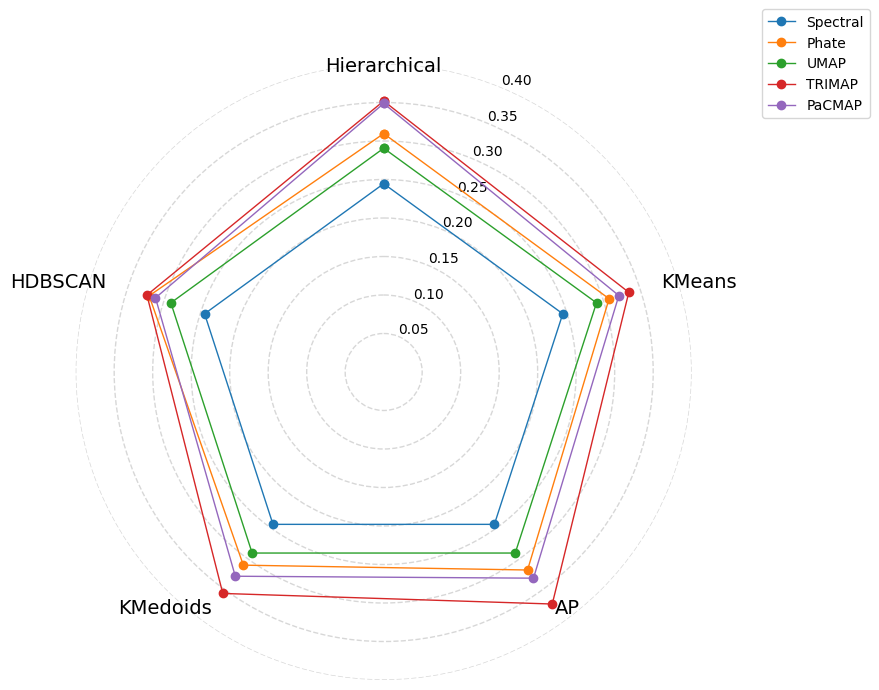

In [ ]:

# Clustering methods와 DR methods 추출
clustering_methods = results_df2['Clustering_methods'].unique()
dr_methods = results_df2['DR_methods'].unique()

# 레이더 차트를 위한 데이터 준비
scores = {dr: [] for dr in dr_methods}
for dr in dr_methods:
    for cluster in clustering_methods:
        nmi_score = results_df2[(results_df2['DR_methods'] == dr) & (results_df2['Clustering_methods'] == cluster)]['Silhouette'].values[0]
        scores[dr].append(nmi_score)

# 레이더 차트 그리기
labels = clustering_methods
num_vars = len(labels)

# 각 DR 방법에 대한 각도를 계산
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 레이더 차트는 원을 닫아야 하므로 마지막 값을 추가
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 각 DR 방법에 대해 레이더 차트 그리기
for dr, nmi_scores in scores.items():
    values = nmi_scores + nmi_scores[:1]
    ax.plot(angles, values, linewidth=1, label=dr, linestyle='-', marker='o')

# 오각형 형태를 맞추기 위해 그리드 설정
ax.spines['polar'].set_visible(False)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 그리드 라인 설정
ax.xaxis.set_tick_params(size=0)
ax.yaxis.set_tick_params(size=0)
ax.grid(linewidth=1, linestyle='--', alpha=0.5)

# 각도 라벨 제거
ax.set_xticks([])

# 각도와 레이블 위치 설정
for i in range(num_vars):
    angle_rad = angles[i]
    ha = 'center'
    distance = ax.get_rmax() * 2  # 라벨이 플롯에 더 가깝게 배치되도록 설정
    if angle_rad == 0:
        ha = 'center'
        distance = ax.get_rmax() * 1.05
    elif 0 < angle_rad < np.pi:
        ha = 'left'
        distance = ax.get_rmax() * 1.00
    elif angle_rad == np.pi:
        ha = 'center'
        distance = ax.get_rmax() * 1.05
    else:
        ha = 'right'
        distance = ax.get_rmax() * 1.00
    ax.text(angle_rad, distance, labels[i], size=14, horizontalalignment=ha, verticalalignment='center')

# 제목 및 범례 설정
ax.set_ylim(0, 0.4)  # y축의 최대 값을 0.4로 설정
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

In [ ]:
res=pd.read_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/5subjects_30methods.csv',index_col=0)

In [ ]:
res

,Method,Variance Ratio Criterion,Silhouette,Davies-Bouldin,Experiment
0,PCA,71.202874,0.119348,-1.733151,Cell_1
1,IPCA,71.202875,0.119348,-1.733151,Cell_1
2,SPCA,72.963437,0.115491,-1.700450,Cell_1
3,FA,37.787384,0.043573,-2.789512,Cell_1
4,LLE,87331.277091,0.873117,-0.294876,Cell_1
...,...,...,...,...,...
25,ICM,76.051085,0.135782,-1.185394,Dose
26,BD,74.399887,0.137457,-1.182654,Dose
27,Nmf,77.167387,0.138998,-1.177117,Dose
28,IVIS,156.718308,0.215037,-1.161385,Dose


In [ ]:
df=res

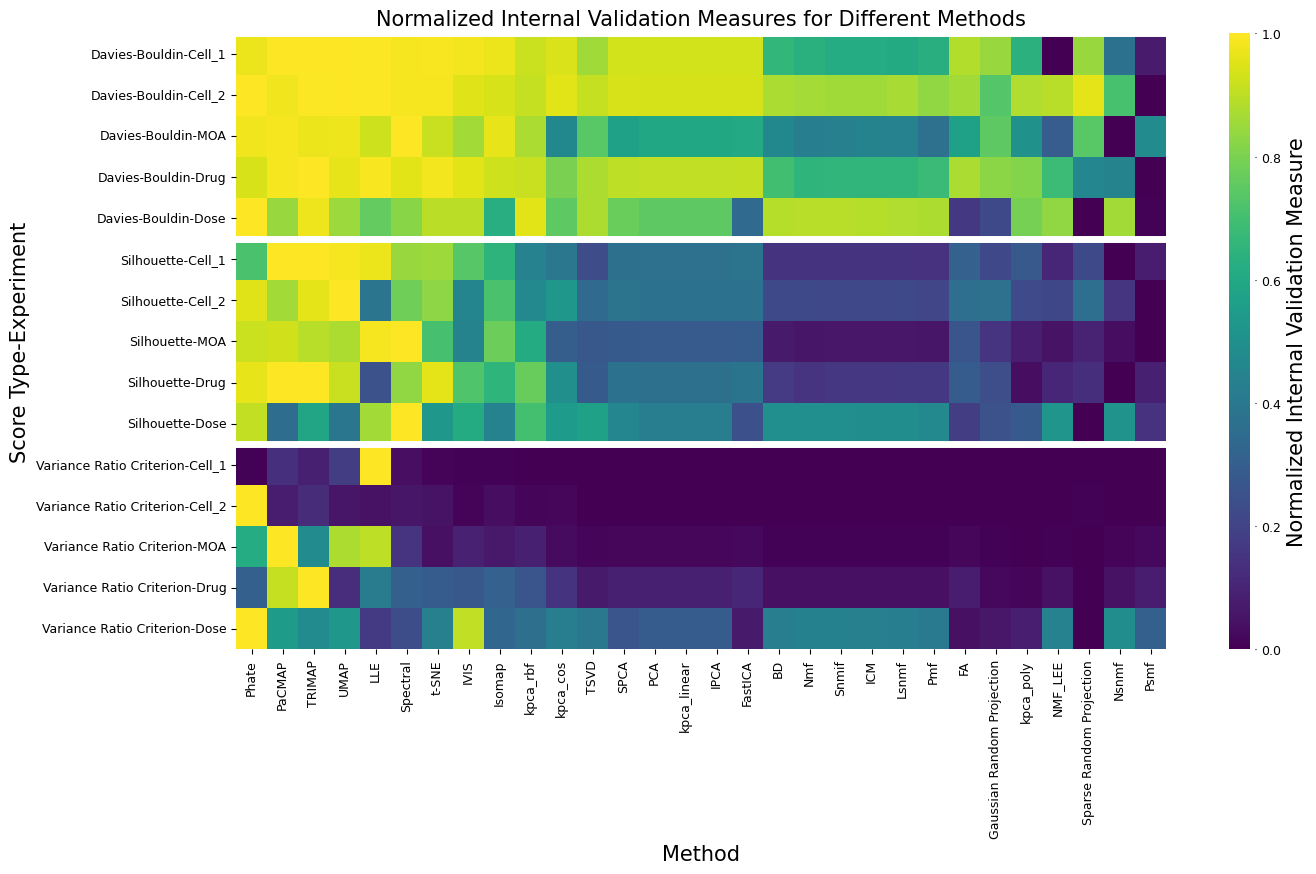

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the data

# Reset index to avoid ambiguity
df = df.reset_index(drop=True)

# Normalize the data within each experiment
def normalize(group):
    scaler = MinMaxScaler()
    group[['Variance Ratio Criterion', 'Silhouette', 'Davies-Bouldin']] = scaler.fit_transform(group[['Variance Ratio Criterion', 'Silhouette', 'Davies-Bouldin']])
    return group

df = df.groupby('Experiment', group_keys=False).apply(normalize)

# Reshape the dataframe for heatmap plotting
df_melted = df.melt(id_vars=["Method", "Experiment"], value_vars=["Variance Ratio Criterion", "Silhouette", "Davies-Bouldin"], var_name="Score Type", value_name="Score")

# Sort methods by overall mean score
method_order = df_melted.groupby('Method')['Score'].mean().sort_values(ascending=False).index

# Define the desired experiment order
experiment_order = ['Cell_1', 'Cell_2', 'MOA', 'Drug', 'Dose']

# Create the heatmap
plt.figure(figsize=(15, 8))
heatmap_data = df_melted.pivot_table(index=['Score Type', 'Experiment'], columns='Method', values='Score').reindex(columns=method_order)

# Reorder the experiments
heatmap_data = heatmap_data.reindex(experiment_order, level='Experiment')

# Create the heatmap with default colorbar position and thicker lines
ax = sns.heatmap(heatmap_data, cmap="viridis", cbar_kws={'label': 'Normalized Internal Validation Measure'})
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)

# Reduce colorbar size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=9, length=1)
cbar.ax.set_aspect(30)

# Separate the three score types with thicker white lines
score_types = df_melted['Score Type'].unique()
separation_indices = [heatmap_data.index.get_loc((score_type, 'Cell_1')) for score_type in score_types[1:]]

for idx in separation_indices:
    ax.axhline(idx, color='white', linewidth=5)

# Add a single separation line between silhouette-moa and variance ratio criterion-cell1
silhouette_moa_index = heatmap_data.index.get_loc(('Silhouette', 'MOA'))
variance_ratio_cell1_index = heatmap_data.index.get_loc(('Variance Ratio Criterion', 'Cell_1'))

if silhouette_moa_index < variance_ratio_cell1_index:
    ax.axhline(silhouette_moa_index + 3, color='white', linewidth=5)

plt.title('Normalized Internal Validation Measures for Different Methods')
plt.show()


#DR + Hierarchical Clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation, SpectralClustering
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, f1_score, adjusted_rand_score, davies_bouldin_score, silhouette_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation, SpectralClustering
import nimfa

In [ ]:
k=5

In [ ]:
import time
from sklearn.preprocessing import MinMaxScaler

# Define models1
models = {
    'PCA': PCA(n_components=n),
    'IPCA': IncrementalPCA(n_components=n),
    'SPCA': SparsePCA(n_components=n),
    'FA': FactorAnalysis(n_components=n, rotation='varimax'),
    'LLE': LocallyLinearEmbedding(n_components=n),
    'kpca_rbf': KernelPCA(n_components=n, kernel="rbf"),
    'kpca_poly': KernelPCA(n_components=n, kernel="poly"),
    'kpca_linear': KernelPCA(n_components=n, kernel="linear"),
    'kpca_cos': KernelPCA(n_components=n, kernel="cosine"),
    'Phate': phate.PHATE(n_components=n),
    'Spectral': SpectralEmbedding(n_components=n),
    'TSVD': TruncatedSVD(n_components=n, n_iter=1000, random_state=7),
    'Gaussian Random Projection': GaussianRandomProjection(n_components=n, eps=0.1, random_state=7),
    'Sparse Random Projection': SparseRandomProjection(n_components=n, eps=0.1, random_state=7),
    'FastICA': FastICA(n_components=n, algorithm='parallel', whiten='arbitrary-variance', max_iter=1000, random_state=7),
    't-SNE': TSNE(n_components=n, random_state=7),
    'UMAP': UMAP(n_components=n, init='random', random_state=7),
    'Isomap': Isomap(n_components=n),
    'TRIMAP': trimap.TRIMAP(n_dims=n),
    'PaCMAP': pacmap.PaCMAP(n_components=n),
}

V = datasets['Dose'].iloc[:, :12328]

scaler=MinMaxScaler()
V_scaled=scaler.fit_transform(V)

y =datasets['Dose'].iloc[:,12328]

# Define models2
models2 = {
    'Snmif': Snmf(V_scaled, seed="random_vcol", rank=n, max_iter=1000),
    'Pmf': Pmf(V_scaled, seed="random_vcol", rank=n, max_iter=1000),
    'Nsnmf': Nsnmf(V_scaled, seed="nndsvd", rank=n, max_iter=1000),
    'NMF_LEE': Nmf(V_scaled, seed="nndsvd", rank=n, max_iter=1000),
    'Lsnmf': Lsnmf(V_scaled, seed="random_vcol", rank=n, max_iter=1000),
    'ICM': Icm(V_scaled, seed="random_vcol", rank=n, max_iter=1000),
    'BD': Bd(V_scaled, seed="random_vcol", rank=n, max_iter=1000)
}

# Combine both dictionaries
all_models = {**models, **models2} #** 딕셔너리 언패킹 통해서 통합


results = {name: {} for name in all_models.keys()}

total_models = len(all_models)
start_time = time.time()

for i, (name, model) in enumerate(all_models.items(), 1): #인덱스가 1부터 시작하도록
    print(f"Processing {name} ({i}/{total_models})")
    model_start_time = time.time()

    if name in models:
        projections = model.fit_transform(V)
        labels=AgglomerativeClustering(n_clusters=k).fit_predict(projections)

    else:
        projections = np.array(model().basis())
        labels=AgglomerativeClustering(n_clusters=k).fit_predict(projections)

    # Evaluate metrics
    results[name]['NMI'] = normalized_mutual_info_score(y, labels)
    results[name]['ARI'] = adjusted_rand_score(y, labels)
    results[name]['Experiment'] = list(datasets.keys())[4]

    model_end_time = time.time()
    elapsed_time = model_end_time - model_start_time
    print(f"Finished {name} in {elapsed_time:.2f} seconds")

total_time = time.time() - start_time
print(f"All models processed in {total_time:.2f} seconds")

Processing PCA (1/27)
Finished PCA in 0.65 seconds
Processing IPCA (2/27)
Finished IPCA in 1.31 seconds
Processing SPCA (3/27)
Finished SPCA in 309.68 seconds
Processing FA (4/27)
Finished FA in 0.62 seconds
Processing LLE (5/27)
Finished LLE in 0.20 seconds
Processing kpca_rbf (6/27)
Finished kpca_rbf in 0.15 seconds
Processing kpca_poly (7/27)
Finished kpca_poly in 0.16 seconds
Processing kpca_linear (8/27)
Finished kpca_linear in 0.16 seconds
Processing kpca_cos (9/27)
Finished kpca_cos in 0.17 seconds
Processing Phate (10/27)
Calculating PHATE...
  Running PHATE on 49 observations and 12328 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.10 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.12 seconds.
  Calculating optimal t...
    Automatically selected t = 13
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PH

/usr/local/lib/python3.10/dist-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (49, 12328) is expensive. Consider setting n_pca.
  warnings.warn(


Finished Spectral in 0.19 seconds
Processing TSVD (12/27)
Finished TSVD in 5.08 seconds
Processing Gaussian Random Projection (13/27)
Finished Gaussian Random Projection in 0.35 seconds
Processing Sparse Random Projection (14/27)
Finished Sparse Random Projection in 0.36 seconds
Processing FastICA (15/27)
Finished FastICA in 0.25 seconds
Processing t-SNE (16/27)
Finished t-SNE in 3.40 seconds
Processing UMAP (17/27)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Finished UMAP in 1.13 seconds
Processing Isomap (18/27)
Finished Isomap in 0.12 seconds
Processing TRIMAP (19/27)
Finished TRIMAP in 0.42 seconds
Processing PaCMAP (20/27)
Finished PaCMAP in 0.33 seconds
Processing Snmif (21/27)
Finished Snmif in 8.18 seconds
Processing Pmf (22/27)
Finished Pmf in 13.21 seconds
Processing Nsnmf (23/27)
Finished Nsnmf in 55.64 seconds
Processing NMF_LEE (24/27)
Finished NMF_LEE in 14.98 seconds
Processing Lsnmf (25/27)
Finished Lsnmf in 1.92 seconds
Processing ICM (26/27)
Finished ICM in 3.38 seconds
Processing BD (27/27)
Finished BD in 1.08 seconds
All models processed in 423.36 seconds


In [ ]:
# Add NMF
nmf = NMF(n_components=n, init='nndsvd', random_state=0, max_iter=1000)
projections1 = nmf.fit_transform(V_scaled)
labels=AgglomerativeClustering(n_clusters=k).fit_predict(projections1)

results['Nmf'] = {
    'NMI' : normalized_mutual_info_score(y, labels),
    'ARI' : adjusted_rand_score(y, labels),
    'Experiment': list(datasets.keys())[4]
}

# Add IVIS
ivis = Ivis(embedding_dims=n, k=5, batch_size=16) #*******************************************
projections2 = ivis.fit_transform(V_scaled)
labels=AgglomerativeClustering(n_clusters=k).fit_predict(projections2)

results['IVIS'] = {
    'NMI' : normalized_mutual_info_score(y, labels),
    'ARI' : adjusted_rand_score(y, labels),
    'Experiment': list(datasets.keys())[4]
}

# Add PSMF
psmf = Psmf(V_scaled, rank=n, max_iter=1000)
projections3 = psmf().basis()
labels=AgglomerativeClustering(n_clusters=k).fit_predict(projections3.toarray())

results['Psmf'] = {
    'NMI' : normalized_mutual_info_score(y, labels),
    'ARI' : adjusted_rand_score(y, labels),
    'Experiment': list(datasets.keys())[4]
}

Building KNN index


100%|██████████| 49/49 [00:00<00:00, 350.33it/s]


Extracting KNN neighbours


100%|██████████| 49/49 [00:00<00:00, 242.24it/s]


Training neural network
Epoch 1/1000
4/4 [==============================] - 1s 27ms/step - loss: 1.2605
Epoch 2/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.8440
Epoch 3/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.6384
Epoch 4/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.5877
Epoch 5/1000
4/4 [==============================] - 0s 34ms/step - loss: 1.8178
Epoch 6/1000
4/4 [==============================] - 0s 31ms/step - loss: 1.2890
Epoch 7/1000
4/4 [==============================] - 0s 25ms/step - loss: 1.2649
Epoch 8/1000
4/4 [==============================] - 0s 31ms/step - loss: 1.4204
Epoch 9/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.9798
Epoch 10/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.8939
Epoch 11/1000
4/4 [==============================] - 0s 26ms/step - loss: 1.9050
Epoch 12/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.9707
Epoch 13/1000

In [ ]:
#all_results3=[]

In [ ]:
all_results3.append(pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Method'}))

In [ ]:
results_df3=pd.concat(all_results3)
results_df3

,Method,NMI,ARI,Experiment
0,PCA,0.609677,0.379852,Cell_1
1,IPCA,0.609677,0.379852,Cell_1
2,SPCA,0.614057,0.385788,Cell_1
3,FA,0.501787,0.27892,Cell_1
4,LLE,0.950322,0.89747,Cell_1
...,...,...,...,...
25,ICM,0.553138,0.3785,Dose
26,BD,0.535821,0.35234,Dose
27,Nmf,0.594233,0.411567,Dose
28,IVIS,0.555526,0.402049,Dose


In [ ]:
results_df3.to_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/5subjects_30methods_6dimensions+clustering_Re.csv')

#rank plot

In [ ]:
!pip install adjustText

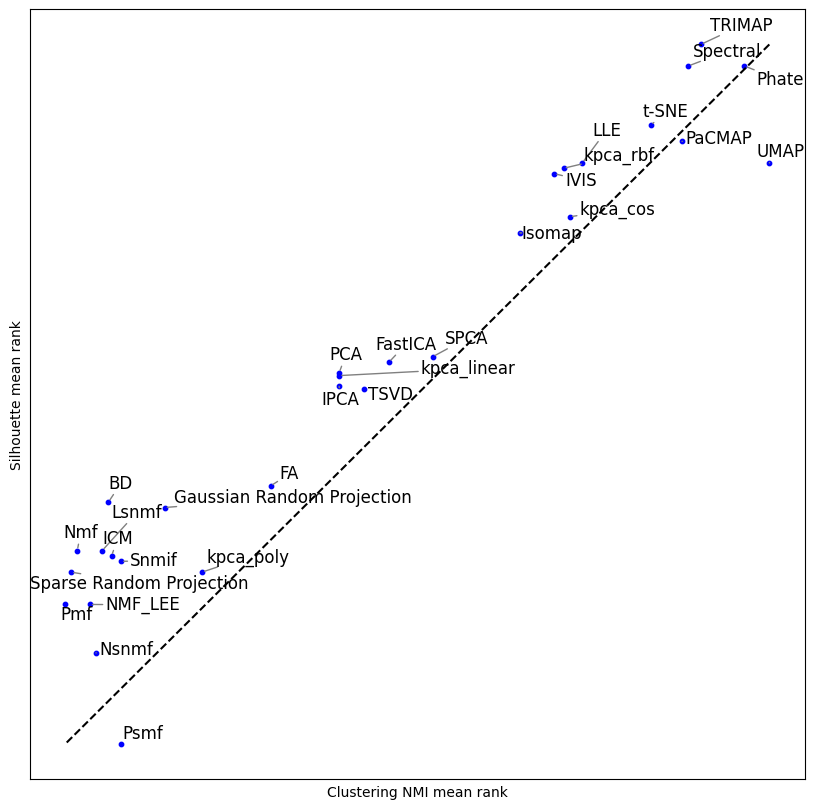

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

df1 = pd.read_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/5subjects_30methods.csv',index_col=0)
df2 = pd.read_csv('/content/drive/MyDrive/Colab/Dimension_Reduction/Data/5subjects_30methods+clustering_Re.csv',index_col=0)

# Calculate the mean rank for silhouette scores from the first dataset
df1['Silhouette Rank'] = df1.groupby('Experiment')['Silhouette'].rank(ascending=False)
silhouette_mean_rank = df1.groupby('Method')['Silhouette Rank'].mean()

# Calculate the mean rank for NMI scores from the second dataset
df2['NMI Rank'] = df2.groupby('Experiment')['NMI'].rank(ascending=False)
nmi_mean_rank = df2.groupby('Method')['NMI Rank'].mean()

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Silhouette Mean Rank': silhouette_mean_rank,
    'NMI Mean Rank': nmi_mean_rank
})

# Plot
plt.figure(figsize=(10, 10))

# Plot small dots
plt.scatter(df_plot['NMI Mean Rank'], df_plot['Silhouette Mean Rank'], s=10, color='blue')

# Add text labels instead of dots
texts = []
for method in df_plot.index:
    texts.append(plt.text(df_plot.loc[method, 'NMI Mean Rank'], df_plot.loc[method, 'Silhouette Mean Rank'], method, fontsize=12))

# Add dashed line
plt.plot([df_plot['NMI Mean Rank'].min(), df_plot['NMI Mean Rank'].max()],
         [df_plot['Silhouette Mean Rank'].min(), df_plot['Silhouette Mean Rank'].max()],
         'k--')

# Set labels
plt.xlabel('Clustering NMI mean rank')
plt.ylabel('Silhouette mean rank')
plt.gca().invert_yaxis()  # Invert y-axis to have best at the top
plt.gca().invert_xaxis()  # Invert x-axis to have best on the right
plt.gca().xaxis.set_ticks([])
plt.gca().yaxis.set_ticks([])

# Adjust text to prevent overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey'))

plt.show()



#5 Methods 2D plot

In [ ]:
# Define your methods and experiments
methods = {
    'Phate': phate.PHATE(n_components=2),
    'UMAP': UMAP(n_components=2, init='random', random_state=7),
    'PaCMAP': pacmap.PaCMAP(n_components=2),
    'Spectral': SpectralEmbedding(n_components=2),
    'TRIMAP': trimap.TRIMAP(n_dims=2)
}

experiments = ['Cell_1', 'Cell_2', 'MOA', 'Drug', 'Dose']



In [ ]:
# Initialize the grid
fig, axes = plt.subplots(len(experiments), len(methods), figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterate over experiments and methods to create scatter plots
for i, exp in enumerate(experiments):
    V = datasets[exp].iloc[:, :12328]
    labels = datasets[exp].iloc[:, 12328]
    for j, (method_name, model) in enumerate(methods.items()):
        projections = model.fit_transform(V)
        ax = axes[i, j]
        sns.scatterplot(x=projections[:, 0], y=projections[:, 1], hue=labels, ax=ax, palette='viridis', legend=None)
        if i == 0:
            ax.set_title(method_name)
        if j == 0:
            ax.set_ylabel(exp)
        else:
            ax.set_ylabel('')
        ax.set_xlabel('')
        ax.set_xticks([])
        ax.set_yticks([])

plt.show()

Calculating PHATE...
  Running PHATE on 152 observations and 1000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.09 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.13 seconds.
  Calculating optimal t...
    Automatically selected t = 8
  Calculated optimal t in 0.03 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.04 seconds.
Calculated PHATE in 0.22 seconds.


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Calculating PHATE...
  Running PHATE on 135 observations and 1000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.12 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.16 seconds.
  Calculating optimal t...
    Automatically selected t = 51
  Calculated optimal t in 0.04 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.05 seconds.
Calculated PHATE in 0.28 seconds.


Calculating PHATE...
  Running PHATE on 279 observations and 12328 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.19 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.12 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 2.37 seconds.
  Calculating optimal t...
    Automatically selected t = 16
  Calculated optimal t in 0.15 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.03 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.31 seconds.
Calculated PHATE in 2.91 seconds.


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


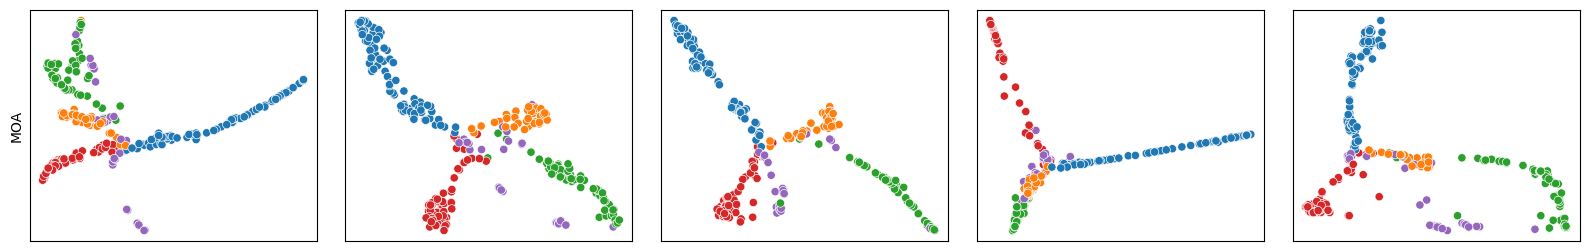

In [ ]:
# Define your methods
methods = {
    'Phate': phate.PHATE(n_components=2),
    'UMAP': UMAP(n_components=2, init='random', random_state=7),
    'PaCMAP': pacmap.PaCMAP(n_components=2),
    'Spectral': SpectralEmbedding(n_components=2),
    'TRIMAP': trimap.TRIMAP(n_dims=2)
}

# Experiment to use
exp = 'MOA'

# Extract data for the experiment 'Cell_1'
V = datasets[exp].iloc[:, :12328]  # Use a subset if needed for testing, e.g., :1000
labels = datasets[exp].iloc[:, 12328]

# Initialize the grid for a single row
fig, axes = plt.subplots(1, len(methods), figsize=(20, 3))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

# Iterate over methods to create scatter plots
for j, (method_name, model) in enumerate(methods.items()):
    projections = model.fit_transform(V)
    ax = axes[j]
    sns.scatterplot(x=projections[:, 0], y=projections[:, 1], hue=labels, ax=ax, legend=None)
    ax.set_title('')
    if j == 0:
      ax.set_ylabel('MOA')
    else:
      ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Calculating PHATE...
  Running PHATE on 279 observations and 12328 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.80 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.85 seconds.
  Calculating optimal t...
    Automatically selected t = 17
  Calculated optimal t in 0.03 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.08 seconds.
Calculated PHATE in 0.99 seconds.


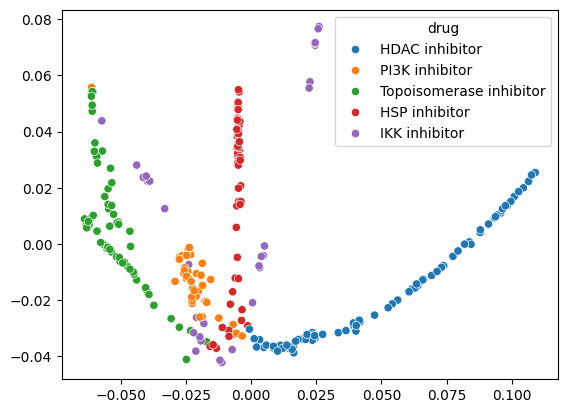

In [ ]:
exp = 'MOA'

V = datasets[exp].iloc[:, :12328]  # Use a subset if needed for testing, e.g., :1000
labels = datasets[exp].iloc[:, 12328]

projections = phate.PHATE(n_components=2).fit_transform(V)

sns.scatterplot(x=projections[:, 0], y=projections[:, 1], hue=labels, legend=True)

plt.show()